In [20]:
# Relevant Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [21]:
# Read the data and convert the date to unix format
data = pd.read_csv('data/property_prices.csv', index_col='id', parse_dates=['date'])
data['date'] = data.date.view('int64') // pd.Timedelta(1, unit='s')
data.shape

C:\Users\b\Anaconda3\lib\site-packages\pandas\core\ops.py:1020: FutureWarning: Floor division between integer array and Timedelta is
deprecated. Use 'array // timedelta.value' instead.
If you want to obtain epochs from an array of timestamps,
you can rather use
'array - pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")'.

  result[mask] = op(x[mask], y)


(27244, 21)

In [22]:
data.head()

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
id,,,,,,,,,,,,,,,,,,,,,
1,200K-400K,Abbotsford,6/241 Nicholson St,1,unit,S,Biggin,1470787200,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019
2,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,1507939200,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
3,400K-600K,Abbotsford,801/1 Acacia Pl,1,unit,S,Jellis,1506124800,3.0,3067,...,1.0,1.0,NaN,50.0,2013.0,Yarra City Council,-37.81177,145.01414,Northern Metropolitan,4019
4,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,1538438400,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
5,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,1463875200,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 1 to 34800
Data columns (total 21 columns):
price_bands              27244 non-null object
suburb                   27244 non-null object
address                  27244 non-null object
rooms                    27244 non-null int64
type                     27244 non-null object
method                   27244 non-null object
realestate_agent         27244 non-null object
date                     27244 non-null int64
distance                 27244 non-null float64
postcode                 27244 non-null int64
bedrooms                 20806 non-null float64
bathrooms                20800 non-null float64
car_parks                20423 non-null float64
landsize                 17982 non-null float64
building_area            10656 non-null float64
year_built               12084 non-null float64
council_area             27244 non-null object
lattitude                20993 non-null float64
longtitude               20993 non-null 

In [24]:
data.describe()

,rooms,date,distance,postcode,bedrooms,bathrooms,car_parks,landsize,building_area,year_built,lattitude,longtitude,suburb_property_count
count,27244.000000,2.724400e+04,27244.000000,27244.000000,20806.000000,20800.000000,20423.000000,17982.000000,10656.000000,12084.000000,20993.000000,20993.000000,27244.000000
mean,2.992365,1.495042e+09,11.280634,3113.799479,3.046237,1.591683,1.715370,593.488933,156.834586,1966.609153,-37.806963,144.996711,7566.781089
std,0.954810,1.928387e+07,6.787580,111.141993,0.955122,0.700880,0.994216,3757.266429,449.222791,36.762373,0.091619,0.120680,4492.382418
min,1.000000,1.453939e+09,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,1.476490e+09,6.400000,3046.000000,2.000000,1.000000,1.000000,219.000000,100.000000,1950.000000,-37.860900,144.925300,4294.000000
50%,3.000000,1.499645e+09,10.500000,3088.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,6567.000000
75%,4.000000,1.509149e+09,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,182.000000,2000.000000,-37.748970,145.068770,10412.000000
max,16.000000,1.538525e+09,48.100000,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,-37.397800,145.526350,21650.000000


In [25]:
data.isnull().sum()

price_bands                  0
suburb                       0
address                      0
rooms                        0
type                         0
method                       0
realestate_agent             0
date                         0
distance                     0
postcode                     0
bedrooms                  6438
bathrooms                 6444
car_parks                 6821
landsize                  9262
building_area            16588
year_built               15160
council_area                 0
lattitude                 6251
longtitude                6251
region_name                  0
suburb_property_count        0
dtype: int64

#### NOTES

There are several features with null values. These are:

- bedrooms

- bathrooms

- car_parks

- landsize

- building_area

- year_built

- lattitude

- longtitude

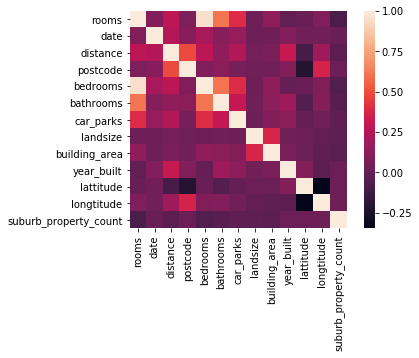

In [26]:
sns.heatmap(data.corr(), vmax=1, square=True)

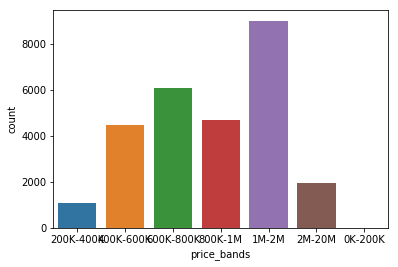

In [70]:
sns.countplot(data['price_bands'])
plt.savefig('count.png')
plt.show()

# Data Preprocessing

In [27]:
data.isnull().sum()

price_bands                  0
suburb                       0
address                      0
rooms                        0
type                         0
method                       0
realestate_agent             0
date                         0
distance                     0
postcode                     0
bedrooms                  6438
bathrooms                 6444
car_parks                 6821
landsize                  9262
building_area            16588
year_built               15160
council_area                 0
lattitude                 6251
longtitude                6251
region_name                  0
suburb_property_count        0
dtype: int64

#### Notes

With many null values, removing features that we are likely to not need will yield a larger dataset to work with when removing null values

In [28]:
data.drop(['address', 'year_built', 'lattitude', 'longtitude','postcode'], axis=1, inplace=True)

In [29]:
data.isnull().sum()

price_bands                  0
suburb                       0
rooms                        0
type                         0
method                       0
realestate_agent             0
date                         0
distance                     0
bedrooms                  6438
bathrooms                 6444
car_parks                 6821
landsize                  9262
building_area            16588
council_area                 0
region_name                  0
suburb_property_count        0
dtype: int64

In [30]:
# Drop all the rows with null values
data_dropped = data.dropna()
data_dropped.shape

X_dropped = data_dropped.drop('price_bands', axis=1)
y_dropped = data_dropped[['price_bands']]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Use get_dummies to convert the features to 'dummy' features
X_dropped = pd.get_dummies(X_dropped)

X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y_dropped, test_size=0.25, random_state=4)

dec_tree_dropped = DecisionTreeClassifier(random_state=4)
dec_tree_dropped.fit(X_train_dropped, y_train_dropped)
dec_tree_dropped_pred = dec_tree_dropped.predict(X_test_dropped)
print(classification_report(y_test_dropped, dec_tree_dropped_pred))

             precision    recall  f1-score   support

    0K-200K       0.00      0.00      0.00         1
      1M-2M       0.74      0.71      0.72       781
  200K-400K       0.61      0.59      0.60        96
     2M-20M       0.67      0.69      0.68       216
  400K-600K       0.63      0.60      0.61       391
  600K-800K       0.53      0.53      0.53       466
    800K-1M       0.41      0.47      0.44       360

avg / total       0.61      0.61      0.61      2311



C:\Users\b\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Notes

Dropping all the null values results in 9244 rows, down from the initial 27244.

This may not be enough data for the machine learning algorithms to identify patterns in the data.

In [32]:
from sklearn.preprocessing import Imputer, LabelEncoder

X = data.drop('price_bands', axis=1)
y = data[['price_bands']]

X = pd.get_dummies(X)
y = LabelEncoder().fit_transform(y)


# Fit imputers to fill null values
X_mean = Imputer(strategy='mean').fit_transform(X)
X_medi = Imputer(strategy='median').fit_transform(X)
X_freq = Imputer(strategy='most_frequent').fit_transform(X)

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
X_imputed = [
    X_mean,
    X_medi,
    X_freq
]

for X in X_imputed:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
    dec_tree = DecisionTreeClassifier(random_state=4)
    dec_tree.fit(X_train, y_train)
    dec_tree_pred = dec_tree.predict(X_test)
    print(classification_report(y_test, dec_tree_pred), end='\n')

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.71      0.71      0.71      2241
          2       0.53      0.48      0.50       265
          3       0.60      0.61      0.60       493
          4       0.59      0.59      0.59      1093
          5       0.53      0.54      0.54      1526
          6       0.41      0.41      0.41      1190

avg / total       0.58      0.58      0.58      6811

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.70      0.71      0.71      2241
          2       0.57      0.51      0.54       265
          3       0.59      0.59      0.59       493
          4       0.59      0.61      0.60      1093
          5       0.52      0.52      0.52      1526
          6       0.40      0.39      0.40      1190

avg / total       0.58      0.58      0.58      6811

             precision    recall  f1-sco

In [34]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer, Normalizer, RobustScaler

scalers = [
    StandardScaler(),
    QuantileTransformer(),
    Normalizer(),
    RobustScaler()
]

for scaler in scalers:
    data_copy = X_dropped.copy()
    data_copy = scaler.fit_transform(data_copy)
    
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(data_copy, y_dropped, test_size=0.25, random_state=4)

    dec_tree_scaled = DecisionTreeClassifier(random_state=4)
    dec_tree_scaled.fit(X_train_scaled, y_train_scaled)
    dec_tree_scaled_pred = dec_tree_scaled.predict(X_test_scaled)
    print(classification_report(y_test_scaled, dec_tree_scaled_pred))
    

C:\Users\b\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

    0K-200K       0.00      0.00      0.00         1
      1M-2M       0.74      0.71      0.72       781
  200K-400K       0.61      0.59      0.60        96
     2M-20M       0.67      0.69      0.68       216
  400K-600K       0.62      0.60      0.61       391
  600K-800K       0.53      0.53      0.53       466
    800K-1M       0.41      0.47      0.44       360

avg / total       0.61      0.61      0.61      2311



C:\Users\b\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

    0K-200K       0.00      0.00      0.00         1
      1M-2M       0.74      0.72      0.73       781
  200K-400K       0.60      0.57      0.59        96
     2M-20M       0.71      0.72      0.72       216
  400K-600K       0.64      0.60      0.62       391
  600K-800K       0.52      0.53      0.53       466
    800K-1M       0.39      0.42      0.41       360

avg / total       0.62      0.61      0.61      2311



C:\Users\b\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

    0K-200K       0.00      0.00      0.00         1
      1M-2M       0.35      0.91      0.51       781
  200K-400K       0.00      0.00      0.00        96
     2M-20M       0.50      0.00      0.01       216
  400K-600K       0.33      0.19      0.24       391
  600K-800K       0.29      0.04      0.07       466
    800K-1M       0.40      0.01      0.01       360

avg / total       0.34      0.35      0.23      2311

             precision    recall  f1-score   support

    0K-200K       0.00      0.00      0.00         1
      1M-2M       0.74      0.71      0.72       781
  200K-400K       0.61      0.59      0.60        96
     2M-20M       0.67      0.69      0.68       216
  400K-600K       0.63      0.60      0.61       391
  600K-800K       0.53      0.53      0.53       466
    800K-1M       0.41      0.47      0.44       360

avg / total       0.61      0.61      0.61      2311



C:\Users\b\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Notes

Although dropping all the null values resulted in a much smaller dataset, the classification was slightly more accurate that filling the null values with the mean, median and the most frequent. 

Scaling didn't have an impact on the test set prediction.

## Feature Engineering

In [35]:
# Demand ratios gathered from realestate.com.au
# See scraper notebook
demand_ratios = pd.read_csv('data/demand_ratios.csv')
demand_ratios.head()

,suburb,demand_ratio
0,Abbotsford,0.485714
1,Aberfeldie,1.799015
2,Airport West,1.477833
3,Albanvale,0.543842
4,Albert Park,3.027586


In [36]:
# Return the demand ratio for a given suburb
def get_demand_ratio(suburb):
    return np.float64(demand_ratios[demand_ratios['suburb'] == suburb]['demand_ratio'])

print(get_demand_ratio('Abbotsford'))

0.4857142857142857


In [37]:
data.head(1)

,price_bands,suburb,rooms,type,method,realestate_agent,date,distance,bedrooms,bathrooms,car_parks,landsize,building_area,council_area,region_name,suburb_property_count
id,,,,,,,,,,,,,,,,
1,200K-400K,Abbotsford,1,unit,S,Biggin,1470787200,2.5,1.0,1.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019


In [38]:
# Add the demand ratio to every row
data['demand_ratio'] = data['suburb'].apply(get_demand_ratio)

In [39]:
data.head(1)

,price_bands,suburb,rooms,type,method,realestate_agent,date,distance,bedrooms,bathrooms,car_parks,landsize,building_area,council_area,region_name,suburb_property_count,demand_ratio
id,,,,,,,,,,,,,,,,,
1,200K-400K,Abbotsford,1,unit,S,Biggin,1470787200,2.5,1.0,1.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019,0.485714


## Feature Selection

In [40]:
from sklearn.metrics import accuracy_score

# Format the data into features and target (X and y)
def prep_data(d, features):
    d = d.dropna()
    X = pd.get_dummies(d.drop('price_bands', axis=1)[features])
    y = LabelEncoder().fit_transform(d[['price_bands']])
    return (X, y)

# Return the accuracy score for a given classifer
def get_accuracy_score(X, y, classifier):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
    c = classifier
    c.fit(X_train, y_train)
    c_pred = c.predict(X_test)
    return accuracy_score(y_test, c_pred)

In [41]:
# Get all the features for forward selection
all_features = [x for x in data.columns]
all_features.remove('price_bands')

results = []

# Find the best singular feature in all the features
for feature in all_features:
    print('.', end=' ')
    X, y = prep_data(data, feature)
    result = get_accuracy_score(X, y, DecisionTreeClassifier(random_state=4))
    results.append([feature, result])

. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. . . . 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

. . 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. . . . 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. . . 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
results_sorted = sorted(results, key=lambda x:x[1], reverse=True)
results_sorted

[['suburb', 0.47641713543920383],
 ['suburb_property_count', 0.4712245781047166],
 ['demand_ratio', 0.46992643877109475],
 ['council_area', 0.4167027260926006],
 ['distance', 0.4154045867589788],
 ['building_area', 0.414106447425357],
 ['type', 0.4067503245348334],
 ['realestate_agent', 0.38208567719601905],
 ['rooms', 0.3773258329727391],
 ['bedrooms', 0.3773258329727391],
 ['bathrooms', 0.34400692340977934],
 ['car_parks', 0.3388143660752921],
 ['method', 0.33794893985287755],
 ['region_name', 0.337083513630463],
 ['landsize', 0.33491994807442665],
 ['date', 0.3336218087408048]]

In [43]:
# The best singular feature was suburb
# Remove from all_features and append to features to start the forward selection
all_features.remove(results_sorted[0][0])
features = [results_sorted[0][0]]
results = [results_sorted[0]]
features

['suburb']

In [44]:
# Repeat forward selection until all features are added.
# Rather than exiting once no improvement has been made,this continues,
# as the score improved after the addition of new features
for i in range(len(all_features)):
    temp_results = []
    # Append a new feature from the remaining features
    for feature in all_features:
        print('.', end=' ')
        f = features.copy()
        f.append(feature)

        X, y = prep_data(data, f)
        result = get_accuracy_score(X, y, DecisionTreeClassifier(random_state=4))
        temp_results.append([feature, result])
    
    # Find the best additional feeature
    best_result = sorted(temp_results, key=lambda x:x[1], reverse=True)[0]
    # Remove from all features and append to features
    all_features.remove(best_result[0])
    features.append(best_result[0])
    results.append((features, best_result[1]))

. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. . 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. . 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. . 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. .

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. .

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. .

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 . 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


. 

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
# Print the best scoring feature list
results_sorted = sorted(results, key=lambda x:x[1], reverse=True)
results_sorted[0]

(['suburb',
  'rooms',
  'type',
  'council_area',
  'region_name',
  'demand_ratio',
  'suburb_property_count',
  'distance',
  'bedrooms',
  'car_parks',
  'method',
  'landsize',
  'realestate_agent',
  'building_area',
  'date',
  'bathrooms'],
 0.6122890523582865)

In [46]:
features = results_sorted[0][0]
features

['suburb',
 'rooms',
 'type',
 'council_area',
 'region_name',
 'demand_ratio',
 'suburb_property_count',
 'distance',
 'bedrooms',
 'car_parks',
 'method',
 'landsize',
 'realestate_agent',
 'building_area',
 'date',
 'bathrooms']

In [47]:
# Basic Decision Tree for comparison 
basic_features = [
    'suburb',
    'type',
    'bedrooms',
    'bathrooms',
    'car_parks',
    'building_area'
]

X, y = prep_data(data, basic_features)
print(get_accuracy_score(X, y, DecisionTreeClassifier(random_state=4)))

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.556901774123756


## Parameter Tuning

In [48]:
# Model 1: 
X1, y1 = prep_data(data, features)
# Model 2: Basic 
X2, y2 = prep_data(data, basic_features)

C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
from sklearn.grid_search import GridSearchCV

dec_tree_params = {
    'max_depth': [2, 4, 8, 16, 32],
    'min_samples_split': [0.2, 0.4, 0.6, 0.8, 1.0],
    'min_samples_leaf':[0.1, 0.2, 0.3, 0.4, 0.5]
}

dec_tree = DecisionTreeClassifier(random_state=4)

dec_tree_1 = GridSearchCV(dec_tree, dec_tree_params, verbose=1)
print('V1:', get_accuracy_score(X1, y1, dec_tree_1))
print(dec_tree_1.best_estimator_)

dec_tree_2 = GridSearchCV(dec_tree, dec_tree_params, verbose=1)
print('V2:', get_accuracy_score(X2, y2, dec_tree_2))
print(dec_tree_2.best_estimator_)

C:\Users\b\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:   31.4s finished


V1: 0.48160969277369103
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')
Fitting 3 folds for each of 125 candidates, totalling 375 fits
V2: 0.409346603202077
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=1.0,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:   16.2s finished


In [50]:
dec_tree_params = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [0.1, 0.2, 0.3],
}

dec_tree_1 = GridSearchCV(dec_tree, dec_tree_params, verbose=1)
print('V1.1:', get_accuracy_score(X1, y1, dec_tree_1))
print(dec_tree_1.best_estimator_)

dec_tree_2 = GridSearchCV(dec_tree, dec_tree_params, verbose=1)
print('V2.1:', get_accuracy_score(X2, y2, dec_tree_2))
print(dec_tree_2.best_estimator_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.6s finished


V1.1: 0.5387278234530506
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')
Fitting 3 folds for each of 15 candidates, totalling 45 fits
V2.1: 0.4495889225443531
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.5s finished


In [51]:
dec_tree_params = {
    'max_depth': np.linspace(1,32,32)
}

dec_tree_1 = GridSearchCV(dec_tree, dec_tree_params, verbose=1)
print('V1.2:', get_accuracy_score(X1, y1, dec_tree_1))
print(dec_tree_1.best_estimator_)

dec_tree_2 = GridSearchCV(dec_tree, dec_tree_params, verbose=1)
print('V2.2:', get_accuracy_score(X2, y2, dec_tree_2))
print(dec_tree_2.best_estimator_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   15.0s finished


V1.2: 0.61964517524881
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')
Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   10.1s finished


V2.2: 0.5305062743401125
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')


In [52]:
dec_tree_params = {
    'max_depth': np.linspace(1,64,64)
}

dec_tree_2 = GridSearchCV(dec_tree, dec_tree_params, verbose=1)
print('V2.3:', get_accuracy_score(X2, y2, dec_tree_2))
print(dec_tree_2.best_estimator_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   28.7s finished


V2.3: 0.5651233232366941
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=64.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')


## Ensemble Comparison

In [65]:
from sklearn.ensemble import RandomForestClassifier

ran_forr = RandomForestClassifier(n_estimators=100,random_state=4)
print('V1:', get_accuracy_score(X1, y1, ran_forr))
print('V2:', get_accuracy_score(X2, y2, ran_forr))

V1: 0.6720034617048897
V2: 0.5798355690177412


## Results

These are the accuracy scores from all of the models created, where V1 is the model with all the features, and V2 is the model with only basic features.

#### Decision Tree 1

V1.2: 0.61964517524881

#### Descision Tree 2

V2.3: 0.5651233232366941

#### Random Forest

V1: 0.6720034617048897

V2: 0.5798355690177412